In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 3s 0us/step


In [5]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [9]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [10]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [11]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


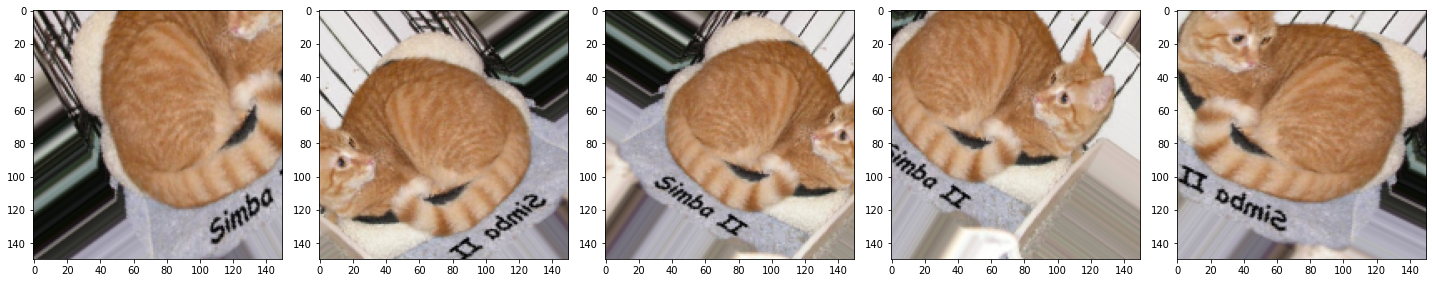

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 10s 488ms/step - loss: 0.7064 - acc: 0.4940 - val_loss: 0.6964 - val_acc: 0.5000
Epoch 2/100
20/20 [==============================] - 9s 447ms/step - loss: 0.6921 - acc: 0.5205 - val_loss: 0.6911 - val_acc: 0.5090
Epoch 3/100
20/20 [==============================] - 9s 444ms/step - loss: 0.6823 - acc: 0.5450 - val_loss: 0.6828 - val_acc: 0.5460
Epoch 4/100
20/20 [==============================] - 8s 424ms/step - loss: 0.6881 - acc: 0.5570 - val_loss: 0.6730 - val_acc: 0.5900
Epoch 5/100
20/20 [==============================] - 9s 445ms/step - loss: 0.6652 - acc: 0.6095 - val_loss: 0.6373 - val_acc: 0.6390
Epoch 6/100
20/20 [==============================] - 9s 437ms/step - loss: 0.6473 - acc: 0.6425 - val_loss: 0.6155 - val_acc: 0.6780
Epoch 7/100
20/20 [==============================] - 9s 439ms/step - loss: 0.6387 - acc: 0.6470 - val_loss: 0.6273 - val_acc: 0.6540
Epoch 8/100
20/20 [==============================] - 9s 434ms/step -

20/20 [==============================] - 9s 438ms/step - loss: 0.5678 - acc: 0.7285 - val_loss: 0.5692 - val_acc: 0.7200
Epoch 38/100
20/20 [==============================] - 9s 438ms/step - loss: 0.5489 - acc: 0.7455 - val_loss: 0.5511 - val_acc: 0.7450
Epoch 39/100
20/20 [==============================] - 9s 440ms/step - loss: 0.5530 - acc: 0.7450 - val_loss: 0.5491 - val_acc: 0.7480
Epoch 40/100
20/20 [==============================] - 9s 442ms/step - loss: 0.5504 - acc: 0.7465 - val_loss: 0.5516 - val_acc: 0.7450
Epoch 41/100
20/20 [==============================] - 9s 434ms/step - loss: 0.5340 - acc: 0.7725 - val_loss: 0.5431 - val_acc: 0.7490
Epoch 42/100
20/20 [==============================] - 9s 441ms/step - loss: 0.5316 - acc: 0.7690 - val_loss: 0.5386 - val_acc: 0.7640
Epoch 43/100
20/20 [==============================] - 9s 450ms/step - loss: 0.5403 - acc: 0.7565 - val_loss: 0.5598 - val_acc: 0.7400
Epoch 44/100
20/20 [==============================] - 9s 430ms/step - loss:

20/20 [==============================] - 9s 432ms/step - loss: 0.4880 - acc: 0.8160 - val_loss: 0.5002 - val_acc: 0.8020
Epoch 75/100
20/20 [==============================] - 9s 448ms/step - loss: 0.4970 - acc: 0.8105 - val_loss: 0.5090 - val_acc: 0.7920
Epoch 76/100
20/20 [==============================] - 9s 439ms/step - loss: 0.5046 - acc: 0.7965 - val_loss: 0.5032 - val_acc: 0.7940
Epoch 77/100
20/20 [==============================] - 9s 442ms/step - loss: 0.4997 - acc: 0.8045 - val_loss: 0.5171 - val_acc: 0.7810
Epoch 78/100
20/20 [==============================] - 9s 440ms/step - loss: 0.5499 - acc: 0.7400 - val_loss: 0.5374 - val_acc: 0.7610
Epoch 79/100
20/20 [==============================] - 9s 438ms/step - loss: 0.5041 - acc: 0.8010 - val_loss: 0.5024 - val_acc: 0.8000
Epoch 80/100
20/20 [==============================] - 9s 451ms/step - loss: 0.4938 - acc: 0.8145 - val_loss: 0.5143 - val_acc: 0.7850
Epoch 81/100
20/20 [==============================] - 9s 431ms/step - loss:

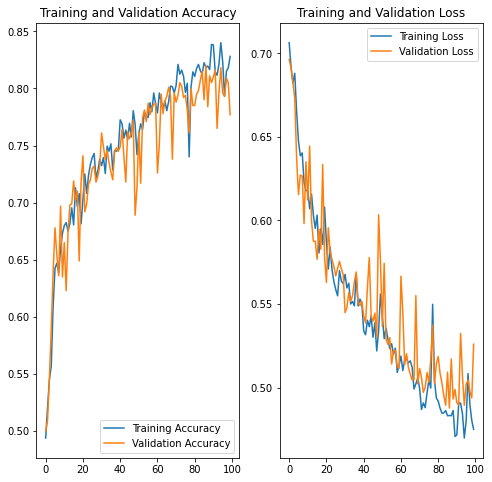

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()